# API Methods

In [ ]:
from zipfile import ZipFile
import random

def get_story(story_file=None):
    transcripts_filename = "transcripts.zip"
    with ZipFile(file_name, 'r') as zip_file:
        files_in_zip = zip_file.filelist
    for i, fileinfo in enumerate(files_in_zip):
        files_in_zip[i] = fileinfo.filename

    if story_file == None:
        story_file = random.choice(files_in_zip)
    elif story_file not in files_in_zip:
        raise ValueError(f"couldn't find {story_file} in transcripts.zip")

    with ZipFile(transcripts_filename, 'r') as zip_file:
        byte_string = zip_file.read(story_file)
    story_text = byte_string.decode(encoding='utf-8')
    return story_text

# Working with Zip Files
# https://www.geeksforgeeks.org/working-zip-files-python/

# print('Random Story:')
# print(get_story())

print('\nStory 3105:')
print(get_story('3105.txt'))


Story 3105:
My alarm clock went off. I got out of 
bed, put on my slippers, and went to feed my 
cats. "Cheech, Penguin!" I only saw Penguin come. 
"Meow." She purred. I changed my clothes, 
brushed my teeth, and ate breakfast. "Hey, 
Jeevan?" I asked. "What?" "can you help me 
look for Cheechee?" "Sure." he said. We were
walking down the sreet and then I saw 
paw-prints. I followed them, but they led to 
my house. I opened the door. I heard a 
meow, and thought it must be Penguin. 
But Penguin was fast asleep. I opened 
my brother's room door. "Meow." I opened 
his closet door and... "Meow!" Cheechee burst 
of the closet. I hugged him and went
out side. I wondered who's pawprints 
were they. Then I saw Sweetie,(my dog) 
playing in the dirt, leaving brown paw-
prints wherever she went. As I went in-
side I thought to my self, Mystery 
solved.


In [ ]:
import pandas as pd
import json

def get_complexities(story_text, metric='len_count'):

    # https://medium.com/@mholtzscher/programmatically-counting-syllables-ca760435fab4
    def count_syllables(word):
        word = word.lower()
        syllable_count = 0
        vowels = 'aeiouy'
        if len(word) == 0:
          return 0
        if word[0] in vowels:
            syllable_count += 1
        for index in range(1, len(word)):
            if word[index] in vowels and word[index - 1] not in vowels:
                syllable_count += 1
        if word.endswith('e'):
            syllable_count -= 1
        if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
            syllable_count += 1
        if syllable_count == 0:
            syllable_count = 1
        return syllable_count

    # remove weird characters
    whitelist = set("abcdefghijklmnopqrstuvwxyz' ABCDEFGHIJKLMNOPQRSTUVWXYZ")
    story_text = ''.join(filter(whitelist.__contains__, story_text))
    # story_text = story_text.lower()  # all lowercase?

    words = story_text.split()
    word_counts = Counter(words)
    words = pd.DataFrame({'word': word_counts.keys(), 'count': word_counts.values()})

    metrics = ['len', 'syl', 'len_count', 'syl_count']
    if metric == 'len':
        words['complexity'] = words['word'].apply(len)

    elif metric == 'syl':
        words['complexity'] = words['word'].apply(count_syllables)

    elif metric == 'len_count':
        words['len'] = words['word'].apply(len)
        words['complexity'] = words['len'] / words['count']

    elif metric == 'syl_count':
        words['syl'] = words['word'].apply(count_syllables)
        words['complexity'] = words['syl'] / words['count']
    
    else:
        raise ValueError(f"metric must be one of {['len', 'syl', 'len_count', 'syl_count']} but got '{metric}'")

    # scale the complexities so the sum is 1000
    words['complexity'] = words['complexity'] / words['complexity'].sum()
    word_compexlities = dict(zip(words.word, words.complexity))
    word_compexlities = json.dumps(word_compexlities)
    return word_compexlities

In [ ]:
import random
from wordcloud import WordCloud
import json

def get_word_cloud(word_complexities, width=640, height=480, background='#000000'):

    # https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
    wc = WordCloud(
        background_color=background,
        width=width,
        height=height,
        colormap='rainbow',  # https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
        )
    
    word_complexities = json.loads(word_complexities)
    wc.generate_from_frequencies(word_complexities)
    return wc.to_image()

In [ ]:
for i, (true, pred) in enumerate(zip(truths, preds)):
  print(f'a truth = {true}, a prediction = {pred}')

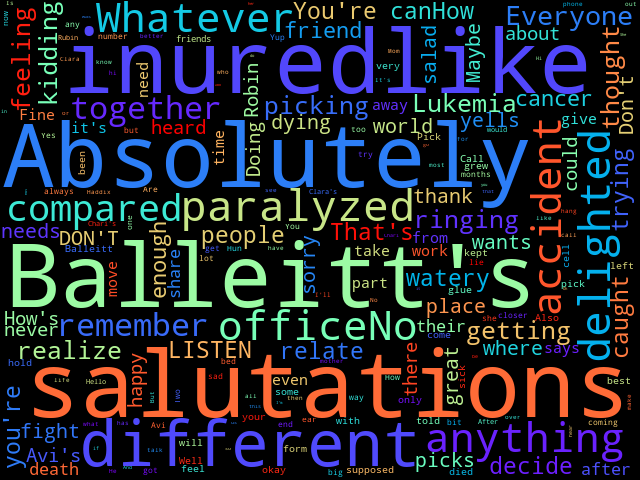

In [ ]:
# with all arguments
# story_text = get_story('3232.txt')
# word_complexities = get_complexities(story_text, metric='syl_count')
# word_cloud = get_word_cloud(word_complexities, width=640, height=480, background='#000000)
# display(word_cloud)

# with minimal arguments
story_text = get_story()  # returns a random story
word_complexities = get_complexities(story_text)
word_cloud = get_word_cloud(word_complexities)
display(word_cloud)

In [ ]:
word_complexities

'{"Dave\'s": 0.014814814814814815, "escapeLet": 0.022222222222222223, "me": 0.0049382716049382715, "go\'": 0.007407407407407408, "said": 0.009876543209876543, "Dave": 0.009876543209876543, "why": 0.007407407407407408, "evil": 0.009876543209876543, "BobOr": 0.012345679012345678, "I\'ll": 0.009876543209876543, "beat": 0.009876543209876543, "you": 0.007407407407407408, "up": 0.0049382716049382715, "Doubt": 0.012345679012345678, "can": 0.007407407407407408, "my": 0.0049382716049382715, "cage": 0.009876543209876543, "Bob": 0.007407407407407408, "was": 0.007407407407407408, "stuck": 0.012345679012345678, "in": 0.0049382716049382715, "a": 0.0024691358024691358, "Bob\'s": 0.012345679012345678, "secret": 0.014814814814814815, "lab": 0.007407407407407408, "tiger": 0.012345679012345678, "and": 0.007407407407407408, "mad": 0.007407407407407408, "rabbit": 0.014814814814814815, "scientist": 0.022222222222222223, "broke": 0.012345679012345678, "through": 0.01728395061728395, "the": 0.0074074074074074

# Old Work

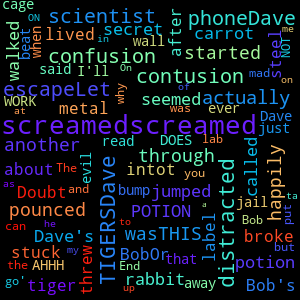

In [ ]:
# Word cloud based on length alone
# words = complexity_table(orig_text_sample)
# word_lengths = list(zip(words.word, words.len))
# length_string = csv_string(word_lengths)
# length_img  = get_word_cloud(length_string)
# display(length_img)

story_text = get_story()
word_complexities = get_complexities(story_text, metric='len')
word_cloud = get_word_cloud(word_complexities, width=300, height=300)
display(word_cloud)

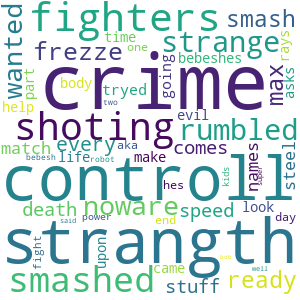

In [ ]:
# Word cloud based on length / occurences
words['len_count'] = words['len'] / words['count']
word_len_counts = list(zip(words.word, words.len_count))
len_count_string = csv_string(word_len_counts)
len_count_img  = get_word_cloud(len_count_string)
display(len_count_img)

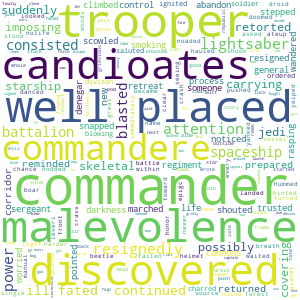

In [ ]:
# Word cloud based on length / occurences for story 5254
table_5254 = complexity_table(transcripts['5254'])
table_5254['len_count'] = table_5254['len'] / table_5254['count']
word_len_counts = list(zip(table_5254.word, table_5254.len_count))
len_count_string = csv_string(word_len_counts)
len_count_img  = get_word_cloud(len_count_string)
display(len_count_img)

import json
# json_string = json.dumps(word_len_counts)

with open('complex_words.json', 'w') as f:
    json.dump(word_len_counts, f)

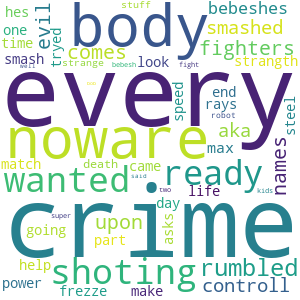

In [ ]:
# Word cloud based on syllables / occurences
words['syl_count'] = words['syl'] / words['count']
word_syl_counts = list(zip(words.word, words.syl_count))
syl_count_string = csv_string(word_syl_counts)
syl_count_img  = get_word_cloud(syl_count_string)
display(syl_count_img)

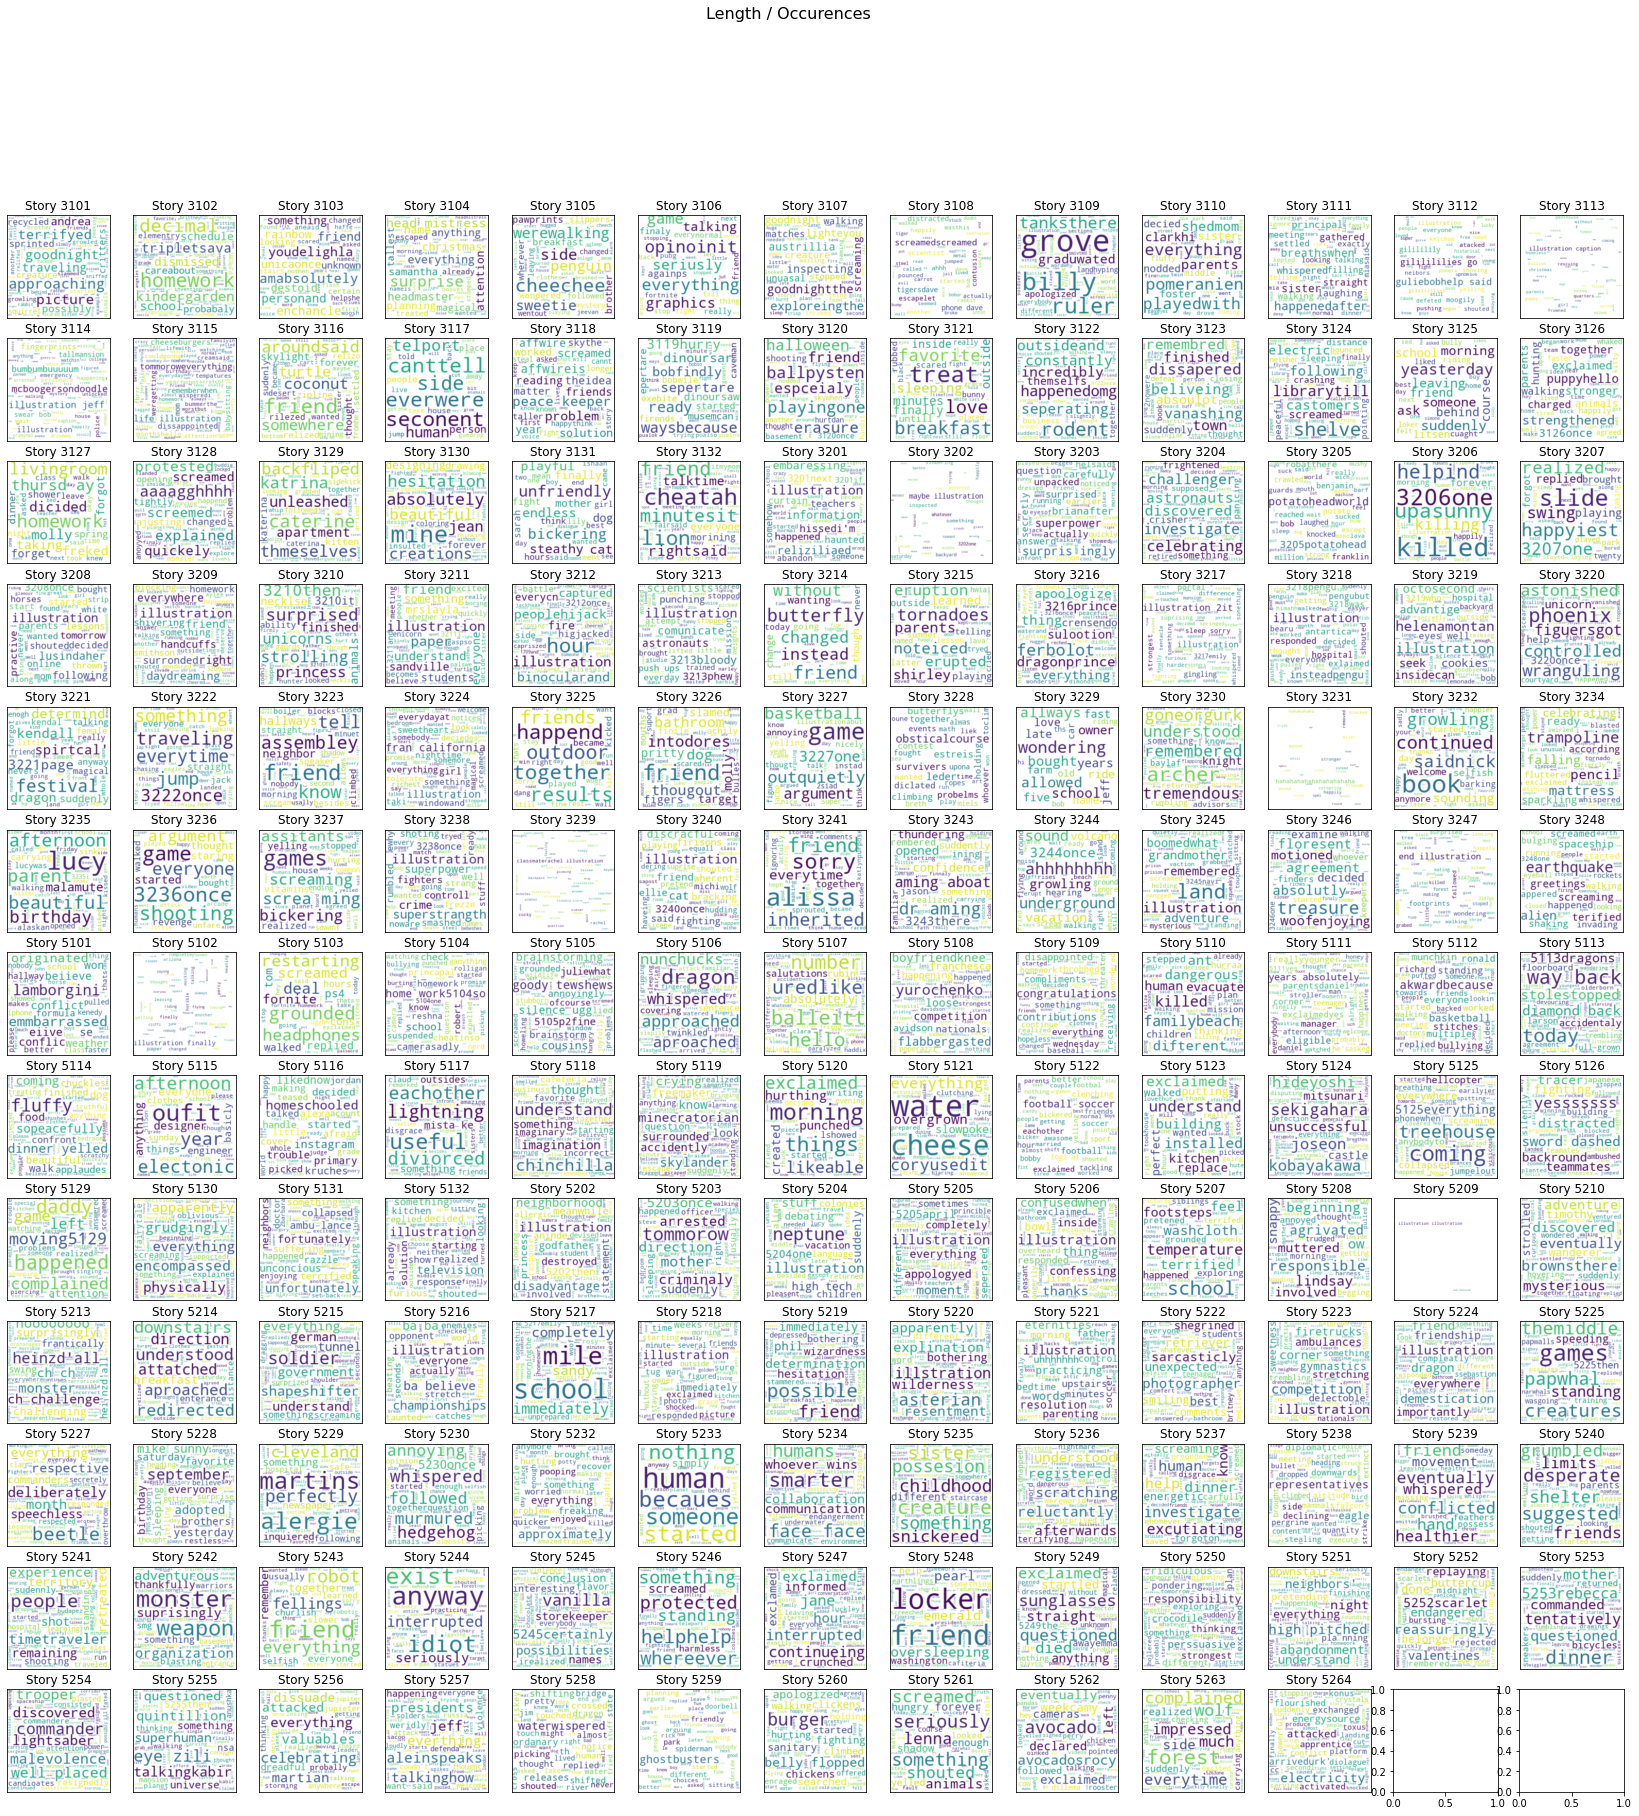

In [ ]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery
from PIL import Image
import matplotlib.pyplot as plt
# import numpy as np

fig, axs = plt.subplots(13, 13, figsize=(29,29))
fig.suptitle('Length / Occurences', fontsize=16)

story_ids = sorted(transcripts.keys())
for i, story_id in enumerate(story_ids):
    ax = axs.flat[i]
    story = transcripts[story_id]
    words = complexity_table(story)
    words['len_count'] = words['len'] / words['count']

    word_len_counts = list(zip(words.word, words.len_count))
    len_count_string = csv_string(word_len_counts)
    len_count_img  = get_word_cloud(len_count_string)

    ax.imshow(len_count_img, interpolation="bilinear")
    ax.set_title(f'Story {story_id}')
    ax.label_outer()
    ax.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

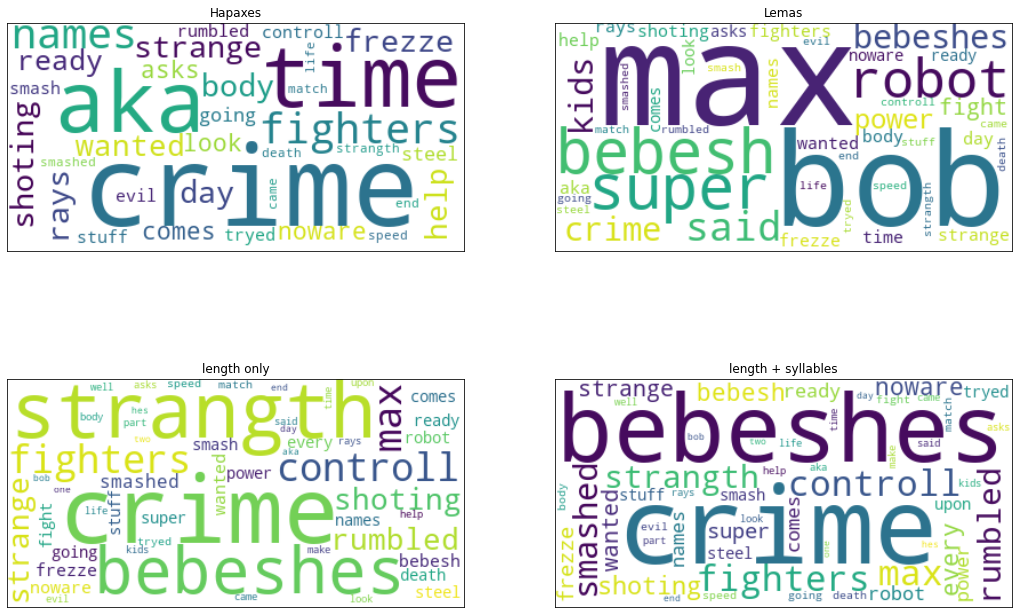

In [ ]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(18,12))

axs[0, 0].imshow(hapax_img, interpolation="bilinear")
axs[0, 0].set_title('Hapaxes')

axs[0, 1].imshow(lemma_img, interpolation="bilinear")
axs[0, 1].set_title('Lemas')

axs[1, 0].imshow(length_img, interpolation="bilinear")
axs[1, 0].set_title('length only')

axs[1, 1].imshow(len_syl_img, interpolation="bilinear")
axs[1, 1].set_title('length + syllables')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

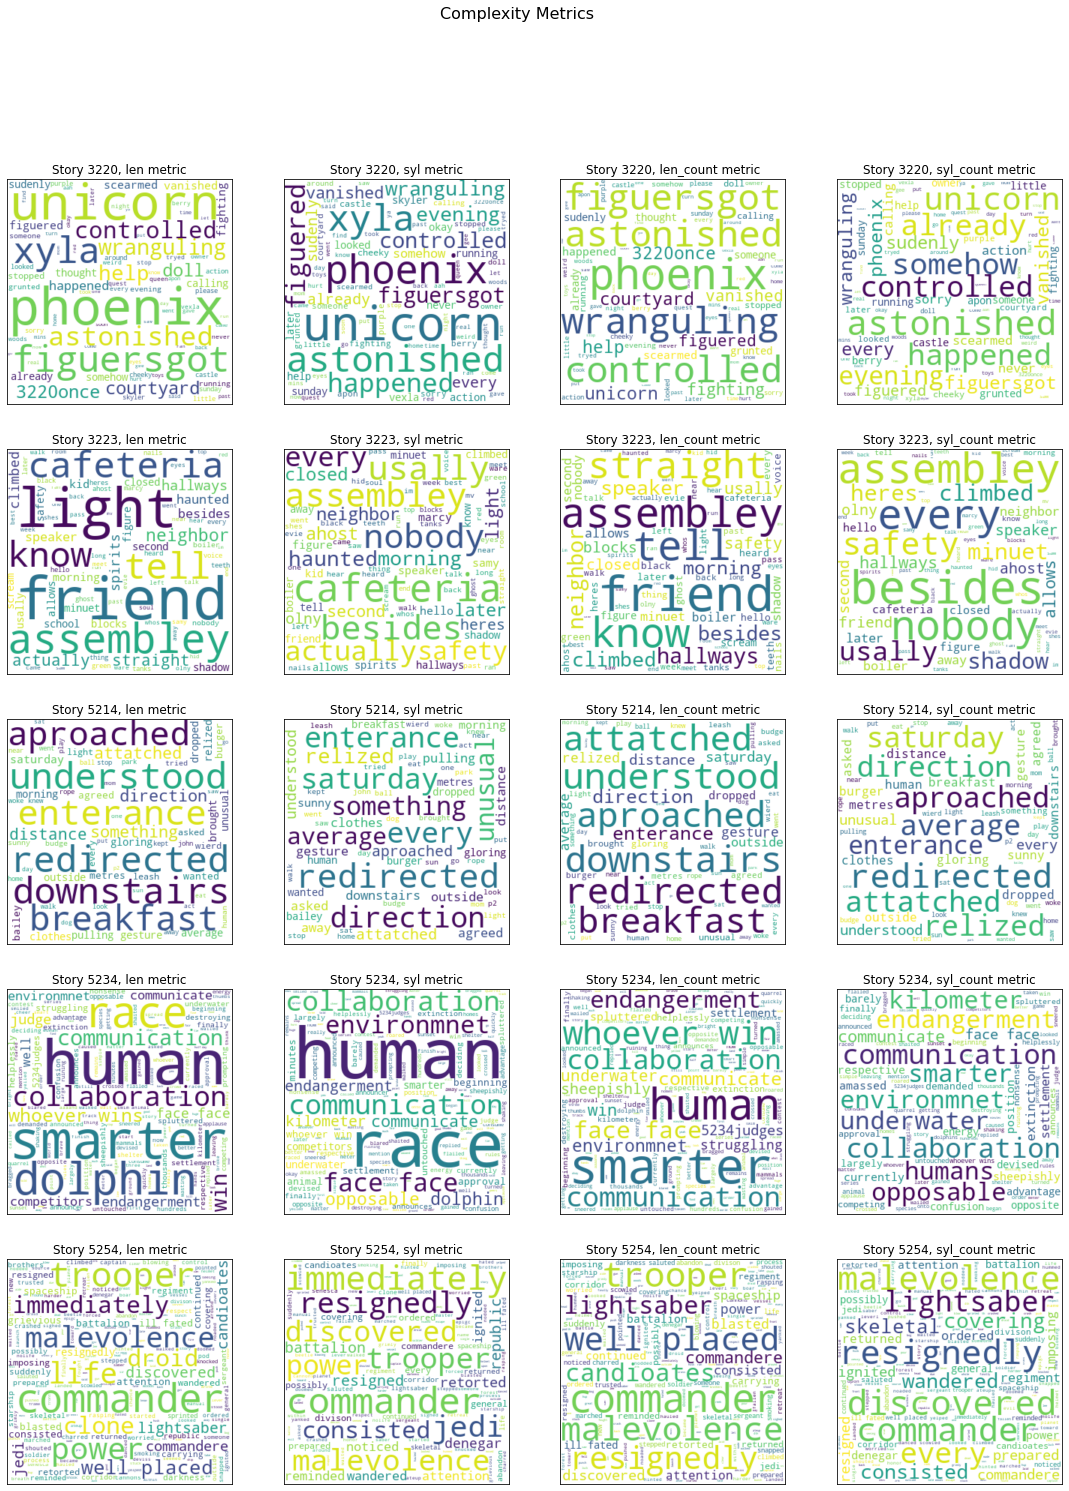

In [ ]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery
from PIL import Image
import matplotlib.pyplot as plt
# import numpy as np

metrics = ['len', 'syl', 'len_count', 'syl_count']
story_ids = ['3220', '3223', '5214', '5234', '5254']

fig, axs = plt.subplots(len(story_ids), len(metrics), figsize=(19,24))
fig.suptitle('Complexity Metrics', fontsize=16)


for col, story_id in enumerate(story_ids):
    story = transcripts[story_id]
    words = complexity_table(story)

    for row, metric in enumerate(metrics):
        word_complexities = list(zip(words.word, words[metric]))
        string = csv_string(word_complexities, 5)
        wc_img = get_word_cloud(string)

        axs[col, row].imshow(wc_img, interpolation="bilinear")
        axs[col, row].set_title(f'Story {story_id}, {metric} metric')
        axs[col, row].label_outer()
        axs[col, row].tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)